# Tâche 9

In [27]:
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import*
import matplotlib.pyplot as plt
import numpy as np

## 1. Télécharger la structure de bande de phonons du matériau

In [6]:
with MPRester(api_key = "msKcAm8eGLQeLLbWk7xJ") as m:
    # !Je me suis connectée sur l'ancien site de materials project j'ai donc une autre API-key que celle enregistrée au debut du quadri!    
    ph_band = m.get_phonon_bandstructure_by_material_id("mp-961687")

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

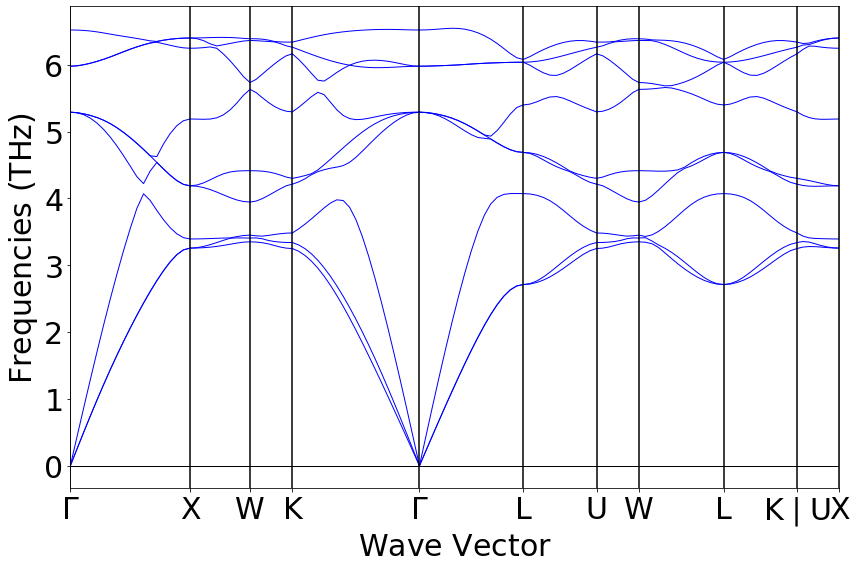

In [10]:
# Visulisation

ph_band_plot = PhononBSPlotter(ph_band) 
ph_band_plot.get_plot() 

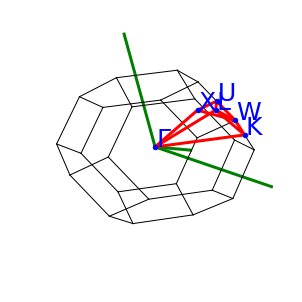

In [11]:
# Zone de Brillouin

ph_band_plot.plot_brillouin()

## 2. Calculer la vitesse du son pour trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin

### 2.1. Branches acoustiques

On trouve les branches acoustiques en regardant quelles branches sont de fréquence nulle au centre de la zone de Brillouin (le point $\Gamma$ comme on peut le voir sur la figure ci-dessus) . On observe donc sur le graphe un peu plus haut que nous avons 3 branches acoustiques différentes dans les trois directions suivantes: $\Gamma$ - $X$, $\Gamma$ - $K$ et $\Gamma$ - $L$.

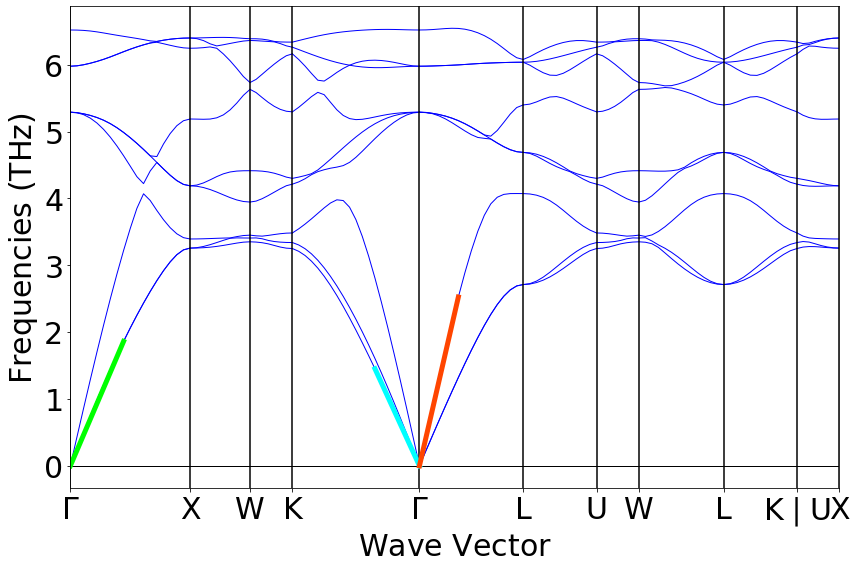

In [46]:
# Visualisation des trois pentes sur le graphe

data = ph_band_plot.bs_plot_data() 
dist = data.get("distances")
freq = data.get("frequency")

ph_band_plot.get_plot()

# Première pente verte dans la direction Gamma-X
plt.plot([dist[0][0],dist[0][8]],[freq[0][1][0],freq[0][1][8]], color='lime', lw=5)

# Deuxième pente bleue dans la direction Gamma-K
plt.plot([dist[3][13],dist[3][-1]],[freq[3][0][13],freq[3][0][-1]], color='cyan', lw=5)

# Troisième pente orange dans la direction Gamma-L
plt.plot([dist[4][0], dist[4][6]],[freq[4][2][0],freq[4][2][6]], color='orangered', lw=5)


### 2.2. Vitesse du son pour ces trois branches acoustiques

Dans l'hypothèse que nous sommes dans le cas de grande longueur d'onde ($\lambda$ >>> a, avec a le paramètre de maille), la formule pour la vitesse du son est la suivante: 

\begin{equation}
v_s = \frac{\partial \omega}{\partial q} = 2\pi\frac{\partial f}{\partial q}
\end{equation}

Nous en deduisons que pour calculer la vitesse du son pour les trois branches acoustiques, il est nécessaire de prendre en compte la pente des courbes correspondantes dans les trois directions identifiées pour les vecteurs d'onde q, en multipliant cette valeur par 2$\pi$. 

Il est également important de tenir compte de la conversion des unités de fréquence et de vecteur d'onde car les unités de la fréquence sont exprimés en Terra Hz ($10^{12}$ Hz) et notre vecteur d'onde est lui exprimé en Angström ($10^{-10}$ m). Nous souhaitons obtenir une vitesse en $[m/s]$.

### Première bande acoustique dans direction $\Gamma - X$

In [42]:
new_freq = (frequency[0][1][1]-frequency[0][1][0])*1e12 # on multiplie par 10^12 pour convertir les THz en Hz
new_dist = (distances[0][1]-distances[0][0])/1e-10 

v_s1 = 2 * np.pi * np.abs(new_freq/new_dist)

print("La vitesse du son pour la première bande acoustique dans la direction Gamma - X vaut : {} m/s.".format(v_s1))


La vitesse du son pour la première bande acoustique dans la direction Gamma - X vaut : 2856.019159022403 m/s.


### Deuxième bande acoustique dans direction $\Gamma - K$

In [43]:
new_freq2 = (frequency[3][0][-1] - frequency[3][0][-2])*1e12
new_dist2 = (distances[3][-1]-distances[3][-2])/1e-10

v_s2 = 2 * np.pi * np.abs(new_freq2/new_dist2)

print("La vitesse du son pour la deuxième bande acoustique dans la direction Gamma - K vaut : {} m/s.".format(v_s2))


La vitesse du son pour la deuxième bande acoustique dans la direction Gamma - K vaut : 2514.5385515659736 m/s.


### Troisième bande acoustique dans direction $\Gamma - L$


In [44]:
new_freq3 = (frequency[4][2][1]-frequency[4][2][0])*1e12
new_dist3 = (distances[4][1]-distances[4][0])/1e-10

v_s3 = 2*np.pi*np.abs(new_freq3/ new_dist3)

print("La vitesse du son pour la troisème bande acoustique dans la direction Gamma - L vaut : {} m/s.".format(v_s3))


La vitesse du son pour la troisème bande acoustique dans la direction Gamma - L vaut : 5170.65502714277 m/s.


Les résultats sont plutôt cohérents car quand on regarde sur le graphe de la section 2.1. (qui met en évidence les pentes dans les trois différentes directions), on voit que la pente en vert et en bleu ont une inclinaison assez similaire et également des vitesses assez similaires. Tandis que la pente en orange elle est plus inclinée et la vitesse correspondante est également plus grande. De plus on se trouve bien dans un ordre de grandeur typique pour la vitesse du son dans un cristal.